In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import decimal
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generate_HT():
    '''
    Function to generate random number to represent head (1) or tail (0) in a coin toss. 
    What I did here is to generate an integer number between 0 and 4, and if it is one, then return one (head), 
    otherwise return zero (tail). This is to say, the probability of getting a head is 0.25, so it is a biased coin.
    '''
    #generate a random integer between 0 and 4
    rnd = np.random.randint(0,4)
    
    if rnd > 1:
        return 0
    else:
        return rnd

In [3]:
def simulation(N = 100):
    '''
    This is the function to simulate multiple toss of a coin, and it returns two numbers and a list:
    number of cases of head, and number of cases of tail, and outcome_list contains all the outcome 
    in order. N is the total number of toss. 
    '''
    outcome_list = []
    R = 0
    for i in range(N):
        out = generate_HT()
        if out == 1:
            R += 1
        outcome_list.append(out)    
    return R, N-R, outcome_list

In [4]:
def plot_exmaple_of_all():
    '''
    This is the funciton to plot the figures show the evolution of the posterior pdf
    as the number of tosses increase. I use 3 priors here:
    1 - Uniform
    2 - Beta Distribution (alpha = 0.5, beta = 0.5)
    3 - Beta Distribution (alpha = 100, beta = 100)
    '''
    n_tosses = [0, 1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
    fig = plt.figure(figsize = (15,9.5))
    
    H = np.linspace(0,1,300)
    
    #do a simulation with 4096 tosses
    total_R, total_T, outcome_list = simulation(N = 4096)
    
    for i, toss in enumerate(n_tosses):
        
        #get the outcome to the tosses
        outcome = outcome_list[0:toss]
        #get the total number of heads
        R = outcome.count(1)
        #get the total number of tails
        T = toss - R
        
        #calculate the posterior
        alpha1 = beta1 = 0.5
        alpha2 = beta2 = 100
        if i > 12:
            #for the last two cases, we need special treatment, otherwise we will have underflow
            #problem, that the posterior will be 0. What I did here is using the decimal module to 
            #calculate the small number, then multiply it with a scalar to scale it so that it is
            #not a small number anymore, then for comparison reasons, I normalize it to 1. 
            y1_uniform = R*np.log(H) + T*np.log(1-H)
            y1_beta1 = (R+alpha1-1)*np.log(H) + (T+beta1-1)*np.log(1-H)
            y1_beta2 = (R+alpha2-1)*np.log(H) + (T+beta2-1)*np.log(1-H)
            
            y_uniform = []
            y_beta1 = []
            y_beta2 = []
            uniform_factor = int((-1)*np.min(y1_uniform[1:-1])/20)
            beta1_factor = int((-1)*np.min(y1_beta1[1:-1])/20)
            beta2_factor = int((-1)*np.min(y1_beta2[1:-1])/20)
            for k in range(len(y1_uniform)):
                y_uniform.append(decimal.Decimal(y1_uniform[k]).exp()*10**uniform_factor)
                y_beta1.append(decimal.Decimal(y1_beta1[k]).exp()*10**beta1_factor)
                y_beta2.append(decimal.Decimal(y1_beta2[k]).exp()*10**beta2_factor)
            
            #normalize so that the maximum is 1 for comparison
            y_uniform = [x * int(1 / np.max(y_uniform)) for x in y_uniform]
            y_beta1 = [x * int(1 / np.max(y_beta1)) for x in y_beta1]
            y_beta2 = [x * int(1 / np.max(y_beta2)) for x in y_beta2]
            
        else:
            y_uniform = H**R*(1-H)**T * 1 
            y_beta1 = H**R*(1-H)**T * H**(alpha1-1)*(1-H)**(beta1-1)
            y_beta2 = H**R*(1-H)**T * H**(alpha2-1)*(1-H)**(beta2-1)
            
            #normalize so that the maximum is 1 for comparison
            y_uniform /= np.max(y_uniform)
            y_beta1 /= np.max(y_beta1[1:-1])
            y_beta2 /=np.max(y_beta2)
            
        #plot the pdf
        ax = plt.subplot(5, 3, i+1)
        ax.plot(H, y_uniform, 'b', label = 'Uniform')
        ax.plot(H, y_beta1, 'r', linestyle='--', label = 'Beta 0.5 0.5')
        ax.plot(H, y_beta2, 'g', linestyle=':', label = 'Beta 100 100')
        plt.ylim((0, 1.2))
        #disable y axis label
        ax.yaxis.set_visible(False)

        # Setting the x-axis major tick's label
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(['0','','0.5','','1'])
        ax.annotate(str(R) + 'H, ' + str(T) + 'T, N=' + str(toss), xy=(1, 0.1), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom')        
    
    plt.show()
    return y_uniform

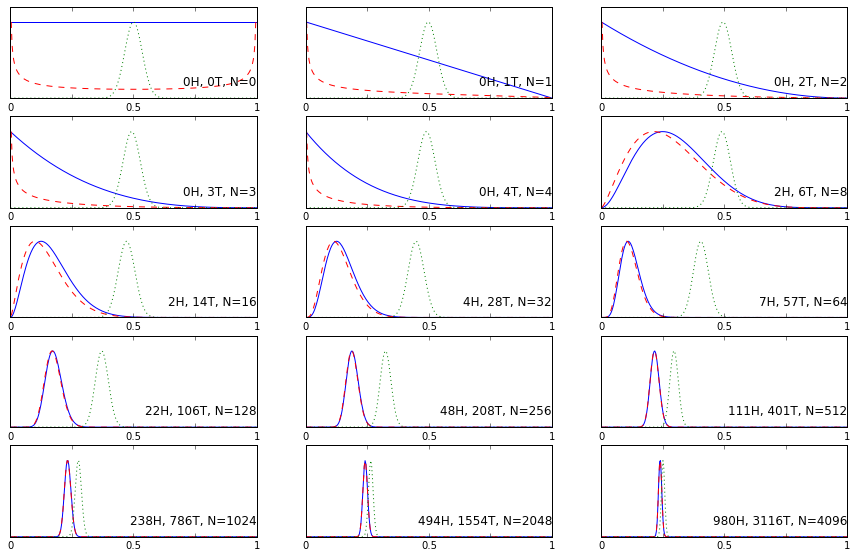

In [5]:
a = plot_exmaple_of_all()